# Sentiment Analysis By Using NN and CNN

Lin Xu, xu.lin@husky.neu.edu

## Abstract

Sentiment analysis or opinion mining is used to automate the detection of subjective information such as opinions, attitudes, emotions, and feelings. I examine sentiment analysis on Sentiment 140 datasets. I use two different model to try the result and see the different between them. Most of these kind of analysis are using RNN but in my test, I try the NN and CNN model instead of RNN. In order to make this easily to understand and only classify the reviews into two classes: Negative and Positive. 

Finally I evaluatie the accuracy and loss of different models and test the result of an input. The comparison depends on two data sets: training data set and test data set.

## Running Python in Jupyter Notebook
Python is an interpreted high-level programming language for general-purpose programming.
To install Python and get tutorials, pelase visit their _[OFFICIAL SITE](https://www.python.org/)_
Or you can also browse the tutorial site _[Lynda.com](https://lynda.com/), they have many fabulous crouses on the site

__Jupyter Notebook__ is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. It is the most popular tool to run Python on.
To have jupyter notebook up and run, please install the IDE Anaconda first.
Or refer to https://github.com/nikbearbrown/INFO_7390/blob/master/Week_1/NBB_Intro_Python.ipynb

## Citiations

[1]Mohey El-Din, Doaa. (2016). Analyzing Scientific Papers Based on Sentiment Analysis (First Draft). 10.13140/RG.2.1.2222.6328.

[2]Go, Alec & Bhayani, Richa & Huang, Lei. (2009). Twitter sentiment classification using distant supervision. Processing. 150. 

[3]B. Pang, L. Lee, and S. Vaithyanathan. Thumbs up Sentiment classification using machine learningtechniques. In Proceedings of the Conference onEmpirical Methods in Natural Language Processing (EMNLP), pages 79–86, 2002.

[4]Text classification with movie reviews
https://www.tensorflow.org/tutorials/keras/basic_text_classification

[5]Creating training and test data sets and preparing the data
https://blog.griddynamics.com/creating-training-and-test-data-sets-and-preparing-the-data-for-twitter-stream-sentiment-analysis-of-social-movie-reviews/
           
[6]Cnn Test Classification
https://github.com/dennybritz/cnn-text-classification-tf/blob/master/text_cnn.py  

[7]A Very Comprehensive Tutorial : NN + CNN
https://www.kaggle.com/shivamb/a-very-comprehensive-tutorial-nn-cnn


## Downloading Data

Before running the notebook, you'll first need to download all data we'll be using.

Sentiment 140 Google Drive link: https://docs.google.com/file/d/0B04GJPshIjmPRnZManQwWEdTZjg/edit

Unzip the file and rename testdata.manual.2009.06.14.csv to testdata.csv, rename training.16000000.processed.noemotion.csv to traindata.csv

## Portable

In order to run the iPython notebook, you'll need the following libraries.

TensorFlow version 1.1 (See below for later versions)

NumPy

Jupyter

pandas

nltk

pip install nltk

then get into python environment and run:

import nltk

nltk.download('punkt')

nltk.download('wordnet')

## Methods

Neural networks are a type of machine learning models which are designed to operate similar to biological neurons and human nervous system. These models are used to recognize complex patterns and relationships that exists within a labelled dataset.

At beginning I implement a 4 layer MLP(Multilayer perceptron) NN Model which has one input layer and two hidden layer and one output layer.

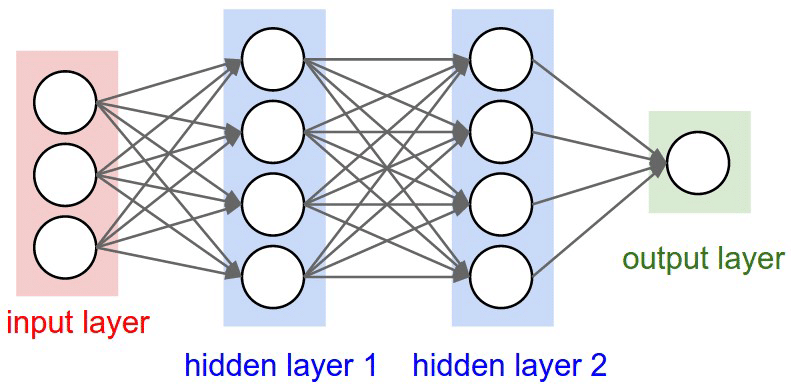

After that, I trained a CNN model. CNNs use a variation of multilayer perceptrons designed to require minimal preprocessing.

input:X's shape is [None, 8057]，Dictionary's  Length is 8057  By embedding_lookup，Convert X to [None, 8057, 128]

After expande_dims get result [None, 8057, 128, 1]

Convolution and pooling ： Convolution Kernel shape is [3/4/5, 128, 1, 128]，length，width, chanel and number of kernel

Result after convolution [None, 8057-3+1, 1, 128]，width change to 1 so the pooling layer shape is [1, 8055, 1, 1] after [None, 1, 1, 128]

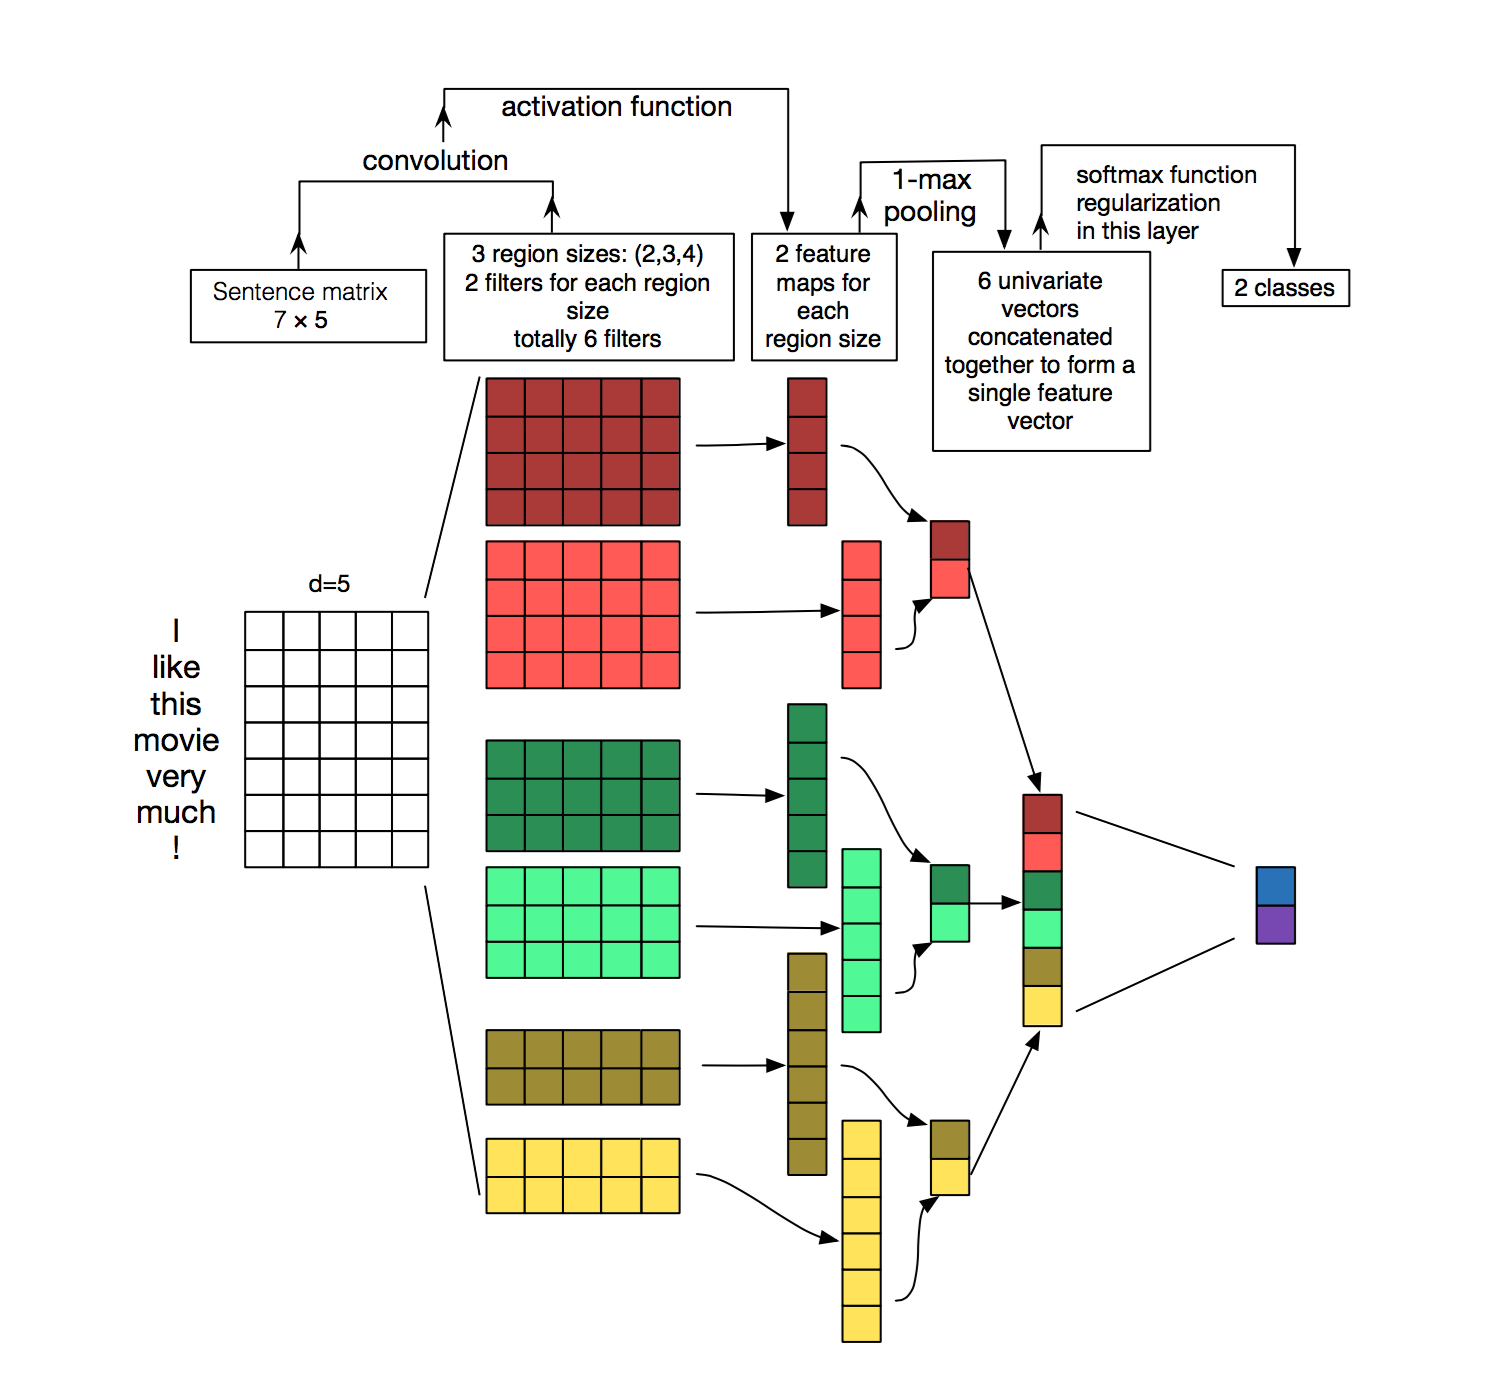

## Evaluation

Once the network was trained, test results being produced at a faster pace as the whole test data could be processed at once. The loss in precision is compensated by results being produced quickly and a network that is much easier to train. Iterate more times then the accurancy is much higher and the loss will approach to zero.

## Loading Data

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import nltk
from nltk.stem import WordNetLemmatizer
from collections import Counter
import pickle
import re

negative label:  1, 0  positive label: 0, 1

save it as a new file

In [3]:
data = pd.read_csv(os.path.join('data', 'traindata.csv'), header=None, encoding='latin-1')
clf = data.values[:, 0]
content = data.values[:, -1]
new_clf = []
for temp in clf:
        # one_hot encoding
    if temp == 0:
        new_clf.append([1, 0]) # neg
    else:
        new_clf.append([0, 1]) # pos
 
df = pd.DataFrame(np.c_[new_clf, content], columns=['emotion0', 'emotion1', 'content'])
df.to_csv(os.path.join('data', 'processed.csv'), index=False)

Read processed data file. 

Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters

In [4]:
with open('data/processed.csv', 'r', encoding='latin-1') as f:
    for lines in f:
        pattern = re.compile(r"[!#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789]")
        lines = re.sub(pattern, '', lines)
        exit

In [5]:
print(lines)

happy charitytuesday theNSPCC SparksCharity SpeakingUpHH 



In [2]:
def sentence_english_manage(line):

    pattern = re.compile(r"[!#$%&'()*+,-./:;<=>?@[\]^_`{|}~0123456789]")
    line = re.sub(pattern, '', line)
    return line

In [3]:
# Save all useful words information into a pkl file
lemmatizer = WordNetLemmatizer()
df = pd.read_csv(os.path.join('data', 'processed.csv'), header=None, encoding='latin-1')
count_word = {} # countNums
all_word = []
for content in df.values[:, 2]:
    words = nltk.word_tokenize(sentence_english_manage(content.lower()))
    for word in words:
        word = lemmatizer.lemmatize(word)
        all_word.append(word)
        
count_word = Counter(all_word)

lex = []
for word in count_word.keys():
    if count_word[word] < 100000 and count_word[word] > 100:
        lex.append(word)

with open('lexcion.pkl', 'wb') as file_write:
    pickle.dump(lex, file_write) 

D:\Anaconda3\envs\tensorflow_gpu\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print (len(lex))

7739


### Construct Neural Network

In [2]:
with open('lexcion.pkl', 'rb') as file_read:
    lex = pickle.load(file_read)

In [3]:
n_input_layer = len(lex) 
#n_layer_1 = 0 # change epoch number here
n_layer_1 = 1500
n_layer_2 = 1500
n_output_layer = 2

X = tf.placeholder(shape=(None, len(lex)), dtype=tf.float32, name="X")
Y = tf.placeholder(shape=(None, 2), dtype=tf.float32, name="Y")
batch_size = 500
dropout_keep_prob = tf.placeholder(tf.float32)

In [4]:
# change activation function at hiden layer.
# PartG Change network initialization, I can set n_layer_1 = 0, in this way it means the hiden layer_1's weight = 0, It will quick but
# also will decrease the accurancy.
def neural_network(data):
    layer_1_w_b = {
        'w_': tf.Variable(tf.random_normal([n_input_layer, n_layer_1])),
        'b_': tf.Variable(tf.random_normal([n_layer_1]))
    }
    layer_2_w_b = {
        'w_': tf.Variable(tf.random_normal([n_layer_1, n_layer_2])),
        'b_': tf.Variable(tf.random_normal([n_layer_2]))
    }
    layer_output_w_b = {
        'w_': tf.Variable(tf.random_normal([n_layer_2, n_output_layer])),
        'b_': tf.Variable(tf.random_normal([n_output_layer]))
    }
    # wx+b
    
    full_conn_dropout_1 = tf.nn.dropout(data, dropout_keep_prob)
    layer_1 = tf.add(tf.matmul(full_conn_dropout_1, layer_1_w_b['w_']), layer_1_w_b['b_'])
    #layer_1 = tf.nn.relu(layer_1)
    layer_1 = tf.nn.sigmoid(layer_1)
    full_conn_dropout_2 = tf.nn.dropout(layer_1, dropout_keep_prob)
    layer_2 = tf.add(tf.matmul(full_conn_dropout_2, layer_2_w_b['w_']), layer_2_w_b['b_'])
    #layer_2 = tf.nn.relu(layer_2)
    layer_2 = tf.nn.sigmoid(layer_2)
    layer_output = tf.add(tf.matmul(layer_2, layer_output_w_b['w_']), layer_output_w_b['b_'])
    # layer_output = tf.nn.softmax(layer_output)
 
    return layer_output

### Helper Functions

In [3]:
def get_random_n_lines(i, data, batch_size):
    # get data from trainset
    
    if ((i * batch_size) % len(data) + batch_size) > len(data):
        rand_index = np.arange(start=((i*batch_size) % len(data)),
                               stop=len(data))
    else:
        rand_index = np.arange(start=((i*batch_size) % len(data)),
                               stop=((i*batch_size) % len(data) + batch_size))
 
    return data[rand_index, :]

In [4]:
def get_test_data(test_file):
    lemmatizer = WordNetLemmatizer()
    df = pd.read_csv(os.path.join('data', test_file))
    group_neg_pos = df.values

    test_x = group_neg_pos[:, 2]
    test_y = group_neg_pos[:, 0:2]

    new_test_x = []
    for tweet in test_x:
        words = nltk.word_tokenize(tweet.lower())
        words = [lemmatizer.lemmatize(word) for word in words]
        features = np.zeros(len(lex))
        for word in words:
            if word in lex:
                features[lex.index(word)] = 1

        new_test_x.append(features)
    return new_test_x, test_y

In [5]:
def get_new_batch_x(batch_x):
    lemmatizer = WordNetLemmatizer()

    new_batch_x = []
    for tweet in batch_x:
        
        words = nltk.word_tokenize(sentence_english_manage(tweet.lower()))
        words = [lemmatizer.lemmatize(word) for word in words]

        features = np.zeros(seq_length)  
        tip = 0
        for word in words:
            if tip >= seq_length:
                break
            if word in lex:
                features[tip] = lex.index(word)  
                tip += 1
            
        new_batch_x.append(features.T)

    return new_batch_x

### Train NN Model
This processed for 2hours on google cloud, So I copy the results, and we can restore the model that had been saved.

In [11]:
tensorboard_dir = "tensorboard/nn"
if not os.path.exists(tensorboard_dir):
    os.makedirs(tensorboard_dir)


predict = neural_network(X)
cost_func = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predict, labels=Y))
tf.summary.scalar('loss', cost_func)
optimizer = tf.train.AdamOptimizer().minimize(cost_func)

correct = tf.equal(tf.argmax(predict, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct, 'float'))
tf.summary.scalar("accuracy", accuracy)

merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter(tensorboard_dir)



df = pd.read_csv(os.path.join('data', 'processed.csv'))


group_by_emotion0 = df.groupby('emotion0')
group_neg = group_by_emotion0.get_group(0).values
group_pos = group_by_emotion0.get_group(1).values

test_x, test_y = get_test_data('testdata.csv')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    writer.add_graph(sess.graph)

    lemmatizer = WordNetLemmatizer()
    saver = tf.train.Saver()

    i = 0

    while i < 5000:
        rand_neg_data = get_random_n_lines(i, group_neg, batch_size)
        rand_pos_data = get_random_n_lines(i, group_pos, batch_size)
        rand_data = np.vstack((rand_neg_data, rand_pos_data))
        np.random.shuffle(rand_data)

        batch_y = rand_data[:, 0:2] # get scores
        batch_x = rand_data[:, 2] # get content info

        new_batch_x = []
        for tweet in batch_x:
            words = nltk.word_tokenize(tweet.lower())
            words = [lemmatizer.lemmatize(word) for word in words]

            features = np.zeros(len(lex))
            for word in words:
                if word in lex:
                    features[lex.index(word)] = 1
            new_batch_x.append(features)



        loss, _, train_acc = sess.run([cost_func, optimizer, accuracy],
                                      feed_dict={X: new_batch_x, Y: batch_y, dropout_keep_prob: 0.6})

        if i % 100 == 0:
            print("Iteration{}，Loss{}, Accuracy{}".format(i, loss, train_acc))
            s = sess.run(merged_summary, feed_dict={X: new_batch_x, Y: batch_y, dropout_keep_prob: 0.6})
            writer.add_summary(s, i)

        if i % 100 == 0:

            test_acc = accuracy.eval({X: test_x[:200], Y: test_y[:200], dropout_keep_prob: 1.0})
            print('Test Accuracy:', test_acc)
        i += 1

    if not os.path.isdir('./checkpoint'):
        os.mkdir('./checkpoint')
    saver.save(sess, './checkpoint/model.ckpt')

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Epoch0，Loss10.938519477844238, Accuracy0.5109999775886536
Test Accuracy: 0.005
Epoch100，Loss6.484046936035156, Accuracy0.531000018119812
Test Accuracy: 0.91
Epoch200，Loss5.62893009185791, Accuracy0.5389999747276306
Test Accuracy: 0.995
Epoch300，Loss4.550694942474365, Accuracy0.5590000152587891
Test Accuracy: 0.84
Epoch400，Loss4.817104339599609, Accuracy0.5440000295639038
Test Accuracy: 0.84
Epoch500，Loss4.108041286468506, Accuracy0.5619999766349792
Test Accuracy: 0.635
Epoch600，Loss3.509320020675659, Accuracy0.5720000267028809
Test Accuracy: 0.635
Epoch700，Loss3.5370500087738037, Accuracy0.5569999814033508
Test Accuracy: 0.635
Epoch800，Loss3.4968624114990234, Accuracy0.5519999861717224
Test Accuracy: 0.535
Epoch900，Loss3.0867674350738525, Accuracy0.5580000281333923
Test Accuracy: 0.51
Epoch1000，Los

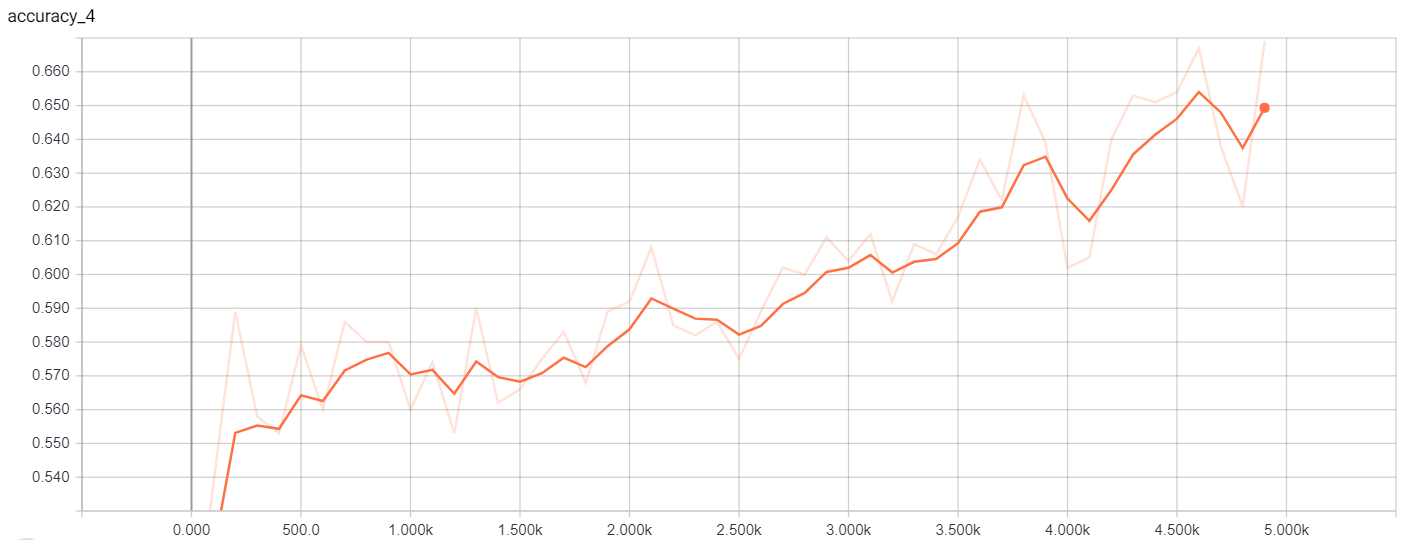

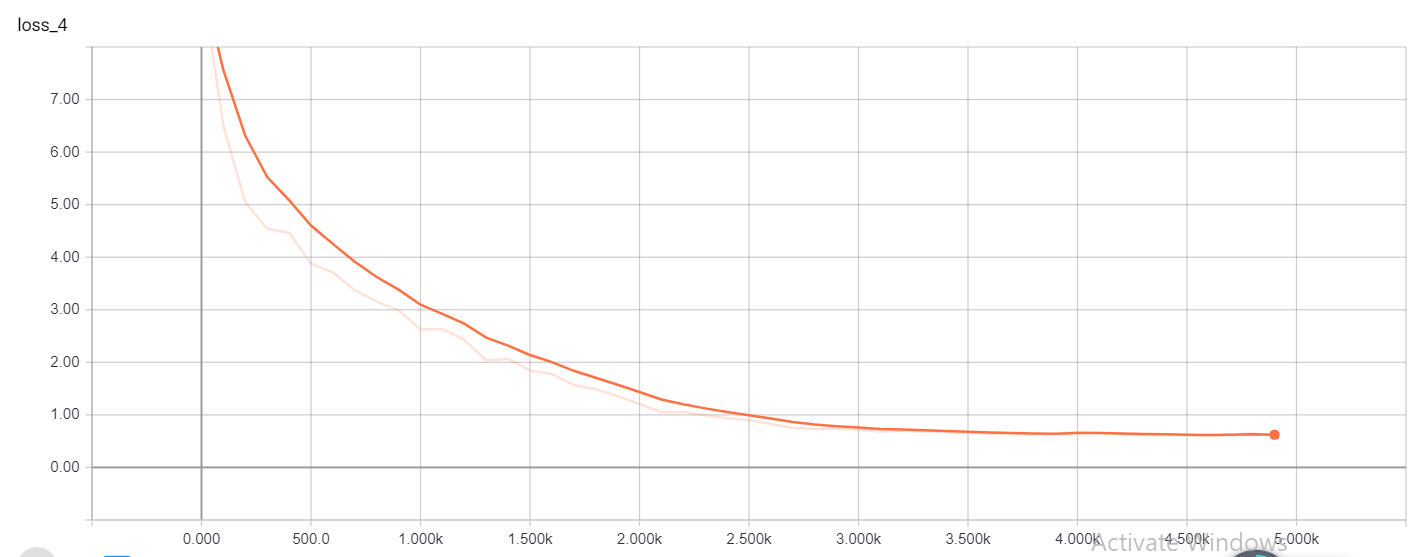

# Construct Convoltional Neural Network

In [6]:
with open('lexcion.pkl', 'rb') as file_read:
    lex = pickle.load(file_read)

input_size = len(lex)
num_classes = 2 
batch_size = 64
seq_length = 150
 
X = tf.placeholder(shape=(None, seq_length), dtype=tf.int32, name="X")
Y = tf.placeholder(shape=[None, num_classes], dtype=tf.float32, name="Y")
 
dropout_keep_prob = tf.placeholder(tf.float32)

In [7]:
def convolutional_neural_network():
    '''
    input:X，shape=[None, 8057]，Dict Length 8057
    By embedding_lookup，Convert X to [None, 8057, 128]
    After expande_dims get result [None, 8057, 128, 1]
    Convolution and pooling ：
    Convolution Kernel shape=[3/4/5, 128, 1, 128]，length，width, chanel and number of kernel
    Result after convolution [None, 8057-3+1, 1, 128]，width change to 1
    pooling layer shape=[1, 8055, 1, 1] after [None, 1, 1, 128]
    '''
 
    with tf.name_scope("embedding"):
        embedding_size = 64
        
        embedding = tf.Variable(tf.random_uniform([input_size, embedding_size], -1.0, 1.0))
        # with tf.Session() as sess:
        #     # sess.run(tf.initialize_all_variables())
        #     temp = sess.run(embedding)
        embedded_chars = tf.nn.embedding_lookup(embedding, X)
        embedded_chars_expanded = tf.expand_dims(embedded_chars, -1) # chanel
 
    # Convolution and pooling
    num_filters = 256
    filter_sizes = [3, 4, 5] 
    pooled_outputs = []
 
    for i, filter_size in enumerate(filter_sizes):
        with tf.name_scope("conv_maxpool_{}".format(filter_size)):
            filter_shape = [filter_size, embedding_size, 1, num_filters] 
            W = tf.Variable(tf.truncated_normal(filter_shape, stddev=0.1))
            b = tf.Variable(tf.constant(0.1, shape=[num_filters]))
 
            conv = tf.nn.conv2d(embedded_chars_expanded, W, strides=[1, 1, 1, 1], padding="VALID")
            h = tf.nn.relu(tf.nn.bias_add(conv, b)) 
 
            pooled = tf.nn.max_pool(h, ksize=[1, seq_length - filter_size + 1, 1, 1],
                                    strides=[1, 1, 1, 1], padding='VALID')
            pooled_outputs.append(pooled)
 
 
    num_filters_total = num_filters * len(filter_sizes)
    '''
    # tensor t3 with shape [2, 3]
    # tensor t4 with shape [2, 3]
    tf.shape(tf.concat([t3, t4], 0))  # [4, 3]
    tf.shape(tf.concat([t3, t4], 1))  # [2, 6]
    '''
    h_pool = tf.concat(pooled_outputs, 3) # [None, 1, 1, 128] -->[None, 1, 1, 384]
    h_pool_flat = tf.reshape(h_pool, [-1, num_filters_total]) #  [None, 384]
 
    # dropout
    with tf.name_scope("dropout"):
        h_drop = tf.nn.dropout(h_pool_flat, dropout_keep_prob)
 
    # output
    with tf.name_scope("output"):
        # fully connected layer
        # from tensorflow.contrib.layers import xavier_initializer
        W = tf.get_variable("w", shape=[num_filters_total, num_classes],
                            initializer=tf.contrib.layers.xavier_initializer()) 
        b = tf.Variable(tf.constant(0.1, shape=[num_classes]))
 
        output = tf.nn.xw_plus_b(h_drop, W, b)
        # output = tf.nn.relu(output)
 
    return output

### Train CNN Model

In [8]:
tensorboard_dir = "tensorboard/cnn"
if not os.path.exists(tensorboard_dir):
    os.makedirs(tensorboard_dir)
    
output = convolutional_neural_network()

predictions = tf.argmax(output, 1)
correct_predictions = tf.equal(predictions, tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float")) 
tf.summary.scalar("accuracy", accuracy)

# change cost function here
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=Y))
# loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=output, labels=Y))
# train_op = tf.train.GradientDescentOptimizer(learning_rate=0.25).minimize(loss)
optimizer = tf.train.AdamOptimizer(0.001)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=Y))
tf.summary.scalar("loss", loss) 
grads_and_vars = optimizer.compute_gradients(loss)
train_op = optimizer.apply_gradients(grads_and_vars)

merged_summary = tf.summary.merge_all()
writer = tf.summary.FileWriter(tensorboard_dir)

saver = tf.train.Saver(tf.global_variables())

df = pd.read_csv(os.path.join('data', 'processed.csv'))

group_by_emotion0 = df.groupby('emotion0')
group_neg = group_by_emotion0.get_group(0).values
group_pos = group_by_emotion0.get_group(1).values

df = pd.read_csv(os.path.join('data', 'testdata.csv'))
group_neg_pos = df.values
test_x = group_neg_pos[:, 2]
test_y = group_neg_pos[:, 0:2]
# test_x, test_y = get_test_data('testdata.csv')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    writer.add_graph(sess.graph)

    i = 0
    pre_acc = 0
    while i < 5000:
        rand_neg_data = get_random_n_lines(i, group_neg, batch_size)
        rand_pos_data = get_random_n_lines(i, group_pos, batch_size)
        rand_data = np.vstack((rand_neg_data, rand_pos_data))
        np.random.shuffle(rand_data)

        batch_x = rand_data[:, 2]
        batch_y = rand_data[:, 0:2]

        new_batch_x = get_new_batch_x(batch_x)
        

        _, loss_, train_acc= sess.run([train_op, loss, accuracy], feed_dict={X: new_batch_x, Y: batch_y, dropout_keep_prob: 0.6})

        if i % 50 == 0:
            print("loss:{}\ntrain_acc:{}".format(loss_, train_acc))
            s = sess.run(merged_summary, feed_dict={X: new_batch_x, Y: batch_y, dropout_keep_prob: 0.5})
            writer.add_summary(s, i)

        if i % 50 == 0:
            
            new_test_x = get_new_batch_x(test_x)
            accur = sess.run(accuracy, feed_dict={X: new_test_x[: 100], Y: test_y[: 100], dropout_keep_prob: 1.0})
            print("Test_Accuracy", accur)
            if accur > pre_acc:
                
                pre_acc = accur
                print("Accuracy:", pre_acc)
                tf.summary.scalar("accur", accur)
                saver.save(sess, "cnn_model/model.ckpt")
        i += 1

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

loss:1.2376084327697754
train_acc:0.546875
Test_Accuracy 0.01
Accuracy: 0.01
loss:1.002100944519043
train_acc:0.53125
Test_Accuracy 0.36
Accuracy: 0.36
loss:0.8638401031494141
train_acc:0.5859375
Test_Accuracy 0.21
loss:0.8284708261489868
train_acc:0.5546875
Test_Accuracy 0.36
loss:0.663307249546051
train_acc:0.6171875
Test_Accuracy 0.36
loss:0.716074526309967
train_acc:0.578125
Test_Accuracy 0.43
Accuracy: 0.43
loss:0.6348413228988647
train_acc:0.6171875
Test_Accuracy 0.43
loss:0.591813325881958
train_acc:0.703125
Test_Accuracy 0.36
loss:0.6731278896331787
train_acc:0.6015625
Test_Accuracy 0.36
loss:0.5475929379463196
train_acc:0.703125
Test_Accuracy 0.36
loss:0.6014837026596069
train_acc:0.703125
Test_Accuracy 0.36
loss:0.6045395135879517
train_acc:0.6640625
Test_Accuracy 0.43
loss:0.559332430362

### Train CNN Model with AdamOptimizer,  softmax_cross_entropy_with_logits

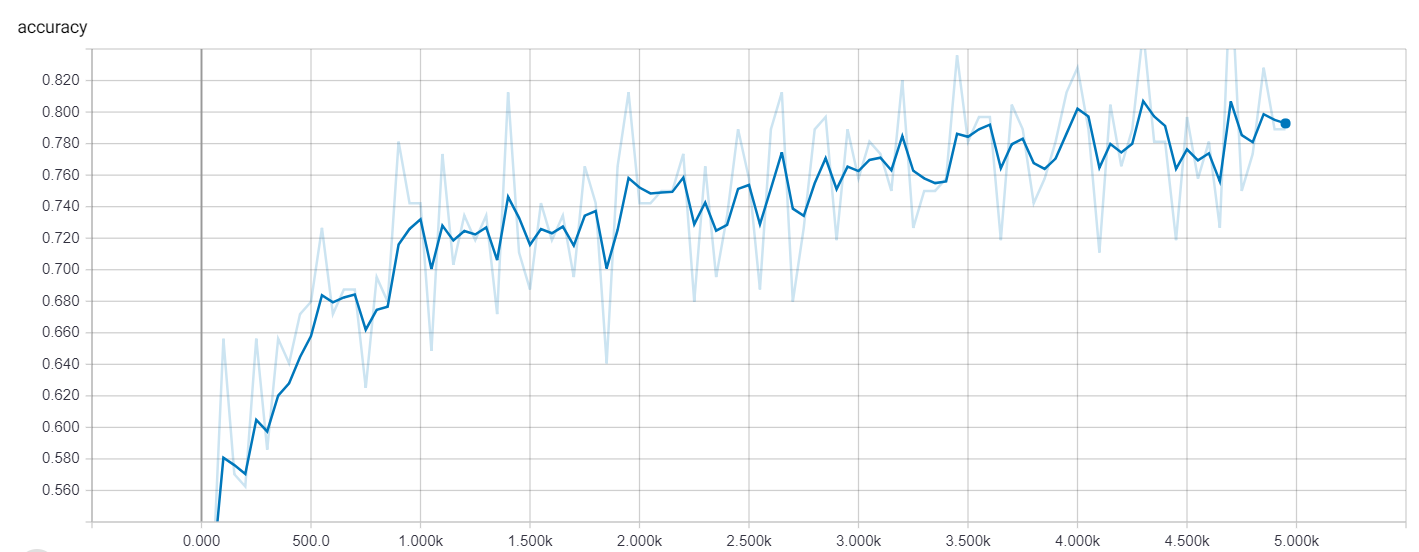

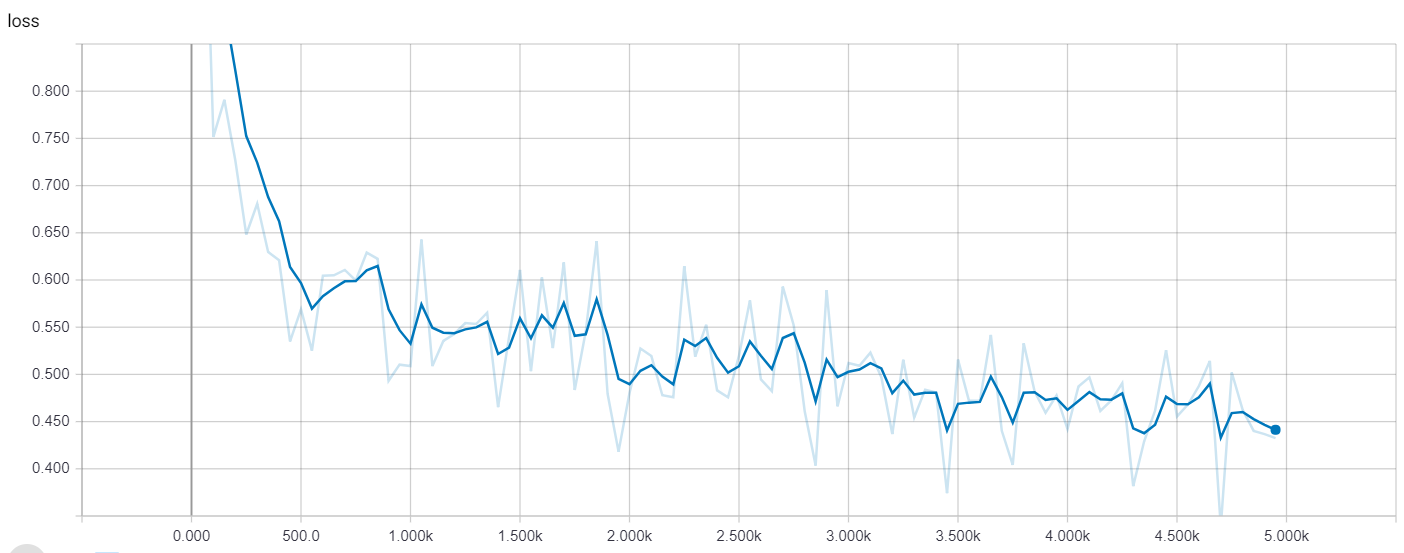

## Test Result

### Restart the kernel, in case of some variables had been defined before.

In [6]:
with open('lexcion.pkl', 'rb') as file_read:
    lex = pickle.load(file_read)
    
n_input_layer = len(lex) 
n_layer_1 = 1500
n_layer_2 = 1500
n_output_layer = 2

X = tf.placeholder(shape=(None, len(lex)), dtype=tf.float32, name="X")

In [7]:
def neural_network_fortest(data):
    layer_1_w_b = {
        'w_': tf.Variable(tf.random_normal([n_input_layer, n_layer_1])),
        'b_': tf.Variable(tf.random_normal([n_layer_1]))
    }
    layer_2_w_b = {
        'w_': tf.Variable(tf.random_normal([n_layer_1, n_layer_2])),
        'b_': tf.Variable(tf.random_normal([n_layer_2]))
    }
    layer_output_w_b = {
        'w_': tf.Variable(tf.random_normal([n_layer_2, n_output_layer])),
        'b_': tf.Variable(tf.random_normal([n_output_layer]))
    }
    # wx+b
    
    layer_1 = tf.add(tf.matmul(data, layer_1_w_b['w_']), layer_1_w_b['b_'])
    layer_1 = tf.nn.sigmoid(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, layer_2_w_b['w_']), layer_2_w_b['b_'])
    layer_2 = tf.nn.sigmoid(layer_2)
    layer_output = tf.add(tf.matmul(layer_2, layer_output_w_b['w_']), layer_output_w_b['b_'])
 
    return layer_output

In [8]:
def predict(data):
    output = neural_network_fortest(X)
    result = tf.argmax(output, 1)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver = tf.train.import_meta_graph('./checkpoint/model.ckpt.meta')
        saver.restore(sess, tf.train.latest_checkpoint('checkpoint'))


        lemmatizer = WordNetLemmatizer()
        words = nltk.word_tokenize(data.lower())
        words = [lemmatizer.lemmatize(word) for word in words]

        features = np.zeros(len(lex),dtype=np.float32)
        for word in words:
            if word in lex:
                features[lex.index(word)] = 1.0

       
        _, prediction = sess.run([output, result],
                                 feed_dict={X: [features]})
        if prediction == 0:
            print("negative")
        else:
            print("positive")

In [9]:
predict("really cool, that's awesome!")

INFO:tensorflow:Restoring parameters from checkpoint\model.ckpt
positive


In [10]:
predict("It's boring, get out!")

INFO:tensorflow:Restoring parameters from checkpoint\model.ckpt
negative


## Conclusion

From the research of above, I could know the CNN has a better performance. When train the NN Model, the accuracy is 0.66 and the loss is 0.61, we also can see the train accuracy is 0.82 and the loss is 0.44. Based on our results, the traditional Neural Network has less accuracy. When we use CNN, the accuracy has improved a lot. By increasing the dataset, we can further improve the accuracy of model. 

## The License

## The MIT License

SPDX short identifier: MIT

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.